# Ultimate Challenge

### Exploratory Data Analysis

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them

#### Main Data

We will use Pandas to work with the data, and start by reading in our JSON data to a Pandas table.

In [88]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy

In [10]:
# Read the data
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
main_data = pd.DataFrame(data)

In [11]:
main_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Our main data set consists of user trips, with information on the user and their usage of Ultimate's service.

#### Logins

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them

In [79]:
logins = pd.read_json('logins.json')
logins = pd.to_datetime(logins['login_time'], format='%Y-%m-%d %H:%M:%S') 


In [80]:
logins.describe()

count                   93142
unique                  92265
top       1970-02-12 11:16:53
freq                        3
first     1970-01-01 20:12:16
last      1970-04-13 18:57:38
Name: login_time, dtype: object

Our data set is for users who created their Ultimate accounts in Jan 2014. These timestamps are trips from January to Mid April, but the timestamp years are mislabeled as 1970. 

In [83]:
logins = logins.reset_index().set_index('login_time')

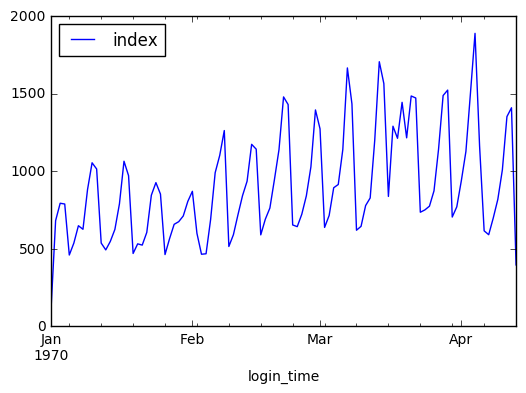

In [91]:
logins.groupby(pd.TimeGrouper('1D')).count().plot()
plt.show()

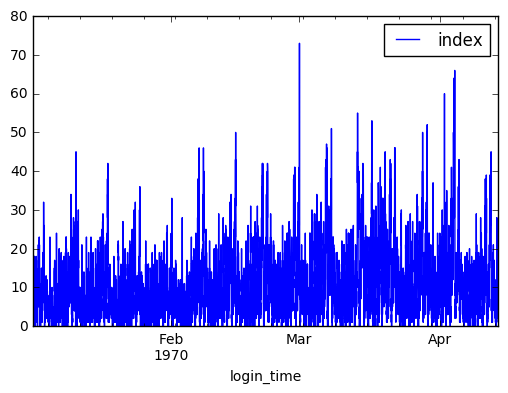

In [92]:
logins.groupby(pd.TimeGrouper('15Min')).count().plot()
plt.show()

### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


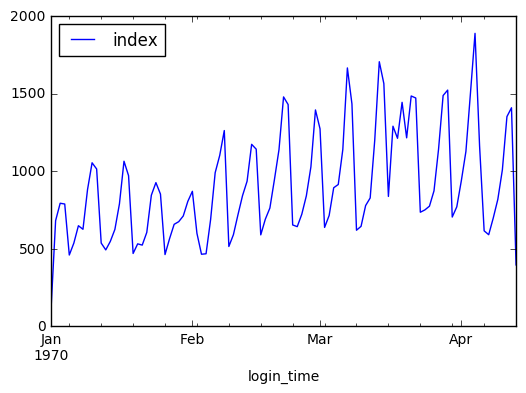

In [91]:
logins.groupby(pd.TimeGrouper('1D')).count().plot()
plt.show()

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

We can define success as number of cross city Ultimate rides taken. It is easy to quantify and a clear indicator of the reimbursement's success - if the number increases, clearly there was a demand for cross city cars that is now being met.

Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a. How you will implement the experiment - A/B testing with the drivers. Randomly assign the reimbursement policy for different days of the weeek to void biases on a given day, and measure if the number of cross city rides truly increases when the reimbursement is given. 

 b. what statistical test(s) you will conduct to verify the significance of the observation
 
Hypothesis testing, where the null hypothesis would be no noticeable difference in cross city rides for reimbursed drivers.

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If the results were statistically significant, I would recommend that the operations team try to place a dollar value or metric on customer satisfaction, because there is a clear need for cross-city rides. If the value add to the company after reimbursing toll increases, or if customer satisfaction is important to retain marketshare, I would recommend the reimbursement.

### Part 3 ‑ Predictive modeling and Conclusions

We want to predict if a user will still be active in 6 months. What fraction of the users were still retained? We will use the company's definition of "retained" - if the rider took  car within 30 days of the signup date. We create a boolean indicator column

In [126]:
model_data = main_data.dropna()
len(model_data)

41445

In [132]:
#We still have over 40,000 data points after removing NAs so we can proceed. 
model_data.columns


Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [145]:
X = model_data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',
       'ultimate_black_user', 'weekday_pct']]

In [147]:
y = model_data.trips_in_first_30_days>0

Now we will fit a model to figure out which variables drive user retention. We will use the random forest model.

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [149]:
clf.feature_importances_


array([ 0.02925043,  0.1732119 ,  0.09397038,  0.17776077,  0.18418534,
        0.00302653,  0.33859465])

The most important predictor was 'weekday_pct'. Whether the user uses the app for weekday transportation or weekend transportation was the most signficant predictor for user retention and Ultimate can focus their marketing accordingly. I am out of time but next steps would include fitting other models, like penalized logistic regression to see which features were most important. I would also incorporate categorical features in the classification and see how the results change. 